## A. Data Loading and Exploration

Importing Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [4]:
Loan = pd.read_csv('Bank+Data+-+Full+Data+-For+final+Day.csv')

In [5]:
Loan.head() # Display of 5 records

,Roll Number Part 1,ID,Gender,DOB,LeadCreationDate,City_Code,City_Feature,Employee_No,Employer_type1,Employer_type2,Income,Customer_bank_code,ExistingBankType,Contacted,Source,Source_Cat,Existing_EMI,Feature1,Approved
0,381,APPP10987536114,Female,17/06/93,02/09/16,C10002,A,COM0052877,A,4,1.4,B029,G,N,S122,G,0.0,0,0
1,884,APPJ10857173523,Female,16/04/91,03/07/16,C10003,A,COM0000002,C,1,2.3,B005,P,N,S133,C,0.0,0,0
2,34,APPN40005263144,Female,22/11/86,04/07/16,C10001,A,COM0005816,A,4,3.5,B002,P,N,S133,C,0.0,0,0
3,920,APPF20377669543,Female,11/01/90,05/08/16,C10001,A,COM0000005,A,1,200.0,B001,P,N,S122,B,0.0,0,0
4,163,APPL30007442336,Female,03/04/94,23/08/16,C10043,B,COM0023428,A,4,200.0,B003,G,N,S133,B,0.0,0,0


Used pandas library to read the data

In [6]:
# Information of the features
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Roll Number Part 1  1982 non-null   int64  
 1   ID                  1982 non-null   object 
 2   Gender              1982 non-null   object 
 3   DOB                 1982 non-null   object 
 4   LeadCreationDate    1982 non-null   object 
 5   City_Code           1982 non-null   object 
 6   City_Feature        1982 non-null   object 
 7   Employee_No         1982 non-null   object 
 8   Employer_type1      1982 non-null   object 
 9   Employer_type2      1982 non-null   int64  
 10  Income              1982 non-null   float64
 11  Customer_bank_code  1982 non-null   object 
 12  ExistingBankType    1982 non-null   object 
 13  Contacted           1982 non-null   object 
 14  Source              1982 non-null   object 
 15  Source_Cat          1982 non-null   object 
 16  Existi

Missing Values in percentage

In [7]:
Loan.isnull().sum()/len(Loan)*100 # loan.isnull().sum()

Roll Number Part 1    0.0
ID                    0.0
Gender                0.0
DOB                   0.0
LeadCreationDate      0.0
City_Code             0.0
City_Feature          0.0
Employee_No           0.0
Employer_type1        0.0
Employer_type2        0.0
Income                0.0
Customer_bank_code    0.0
ExistingBankType      0.0
Contacted             0.0
Source                0.0
Source_Cat            0.0
Existing_EMI          0.0
Feature1              0.0
Approved              0.0
dtype: float64

No missing Values found

In [8]:
# Duplicate Records 
Loan[Loan.duplicated()]

,Roll Number Part 1,ID,Gender,DOB,LeadCreationDate,City_Code,City_Feature,Employee_No,Employer_type1,Employer_type2,Income,Customer_bank_code,ExistingBankType,Contacted,Source,Source_Cat,Existing_EMI,Feature1,Approved


No Duplicated records found

###  Analysing Target Variable - Approved

In [9]:
print(Loan['Approved'].dtype)
Loan['Approved'].value_counts()

int64


0    991
1    991
Name: Approved, dtype: int64

<AxesSubplot: xlabel='Approved', ylabel='count'>

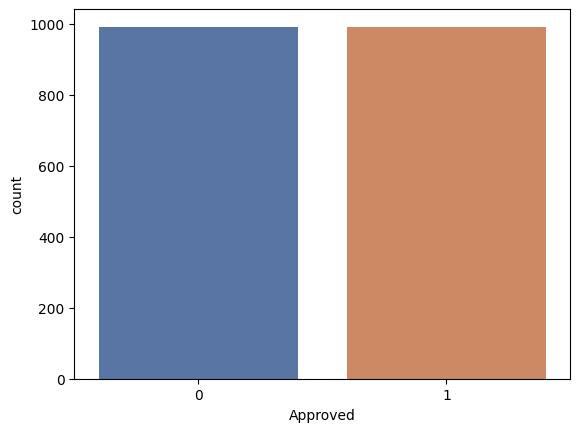

In [10]:
sns.countplot(data = Loan , x = 'Approved' , palette = 'deep')

Equal number of Approved and Not Approved (50% - 50%) , Balanced 

## B. Data Cleaning and Exploratory Data Analysis.

### 1) Creating new dataframe with'features - Gender', 'City_feature', 'Employer_type1','Employer_type2',’Income’,’ExistingBankType','Source_Cat','Existing_EMI',’Feature1',‘Approved’


In [11]:
Loan = Loan[['Gender', 'City_Feature', 'Employer_type1','Employer_type2','Income','ExistingBankType','Source_Cat','Existing_EMI','Feature1','Approved']]

In [12]:
# info of the Dataframe with Selected feture
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1982 non-null   object 
 1   City_Feature      1982 non-null   object 
 2   Employer_type1    1982 non-null   object 
 3   Employer_type2    1982 non-null   int64  
 4   Income            1982 non-null   float64
 5   ExistingBankType  1982 non-null   object 
 6   Source_Cat        1982 non-null   object 
 7   Existing_EMI      1982 non-null   float64
 8   Feature1          1982 non-null   int64  
 9   Approved          1982 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 155.0+ KB


###  Convert non-numeric features to transform into numeric ones

Approach - Used Labelencoder from sklearn Library to assign the numerical values for each categorical feature

In [13]:
Loan.select_dtypes(include = 'object').columns

Index(['Gender', 'City_Feature', 'Employer_type1', 'ExistingBankType',
       'Source_Cat'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder 
# Gender
le = LabelEncoder() 
Loan['Gender']= le.fit_transform(Loan['Gender']) 
Loan['Gender'].value_counts()

1    1296
0     686
Name: Gender, dtype: int64

In [15]:
# City_Feature
print(Loan['City_Feature'].value_counts())
Loan['City_Feature']= le.fit_transform(Loan['City_Feature']) 
Loan['City_Feature'].value_counts()

A    1525
C     263
B     194
Name: City_Feature, dtype: int64


0    1525
2     263
1     194
Name: City_Feature, dtype: int64

In [16]:
# Employer_type1
print(Loan['Employer_type1'].value_counts())
Loan['Employer_type1']= le.fit_transform(Loan['Employer_type1']) 
Loan['Employer_type1'].value_counts() # A-0 , B-1 , C-2

A    832
B    627
C    523
Name: Employer_type1, dtype: int64


0    832
1    627
2    523
Name: Employer_type1, dtype: int64

In [17]:
# ExistingBankType
print(Loan['ExistingBankType'].value_counts())
Loan['ExistingBankType']= le.fit_transform(Loan['ExistingBankType']) 
Loan['ExistingBankType'].value_counts() # P-0 , G-1

P    1448
G     534
Name: ExistingBankType, dtype: int64


1    1448
0     534
Name: ExistingBankType, dtype: int64

In [18]:
# Source_Cat
print(Loan['Source_Cat'].value_counts())
Loan['Source_Cat']= le.fit_transform(Loan['Source_Cat']) 
Loan['Source_Cat'].value_counts()

B    909
G    697
C    331
E     30
F     15
Name: Source_Cat, dtype: int64


0    909
4    697
1    331
2     30
3     15
Name: Source_Cat, dtype: int64

## Analysis of the Predictors

### 1. Gender

In [19]:
Loan.Gender.value_counts()

1    1296
0     686
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='count'>

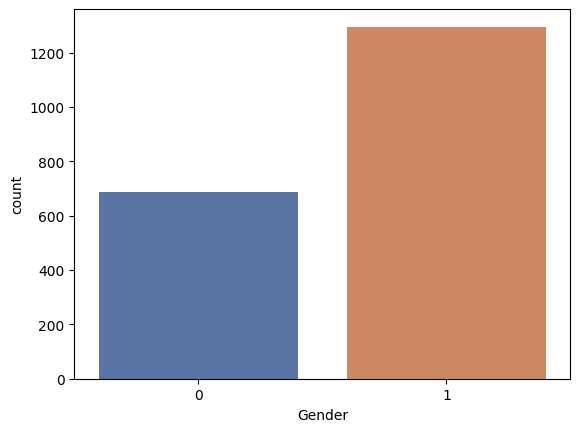

In [20]:
sns.countplot(data = Loan , x = 'Gender' , palette = 'deep')

### 2. City_Feature

In [22]:
Loan.City_Feature.value_counts()

0    1525
2     263
1     194
Name: City_Feature, dtype: int64

<AxesSubplot: xlabel='City_Feature', ylabel='count'>

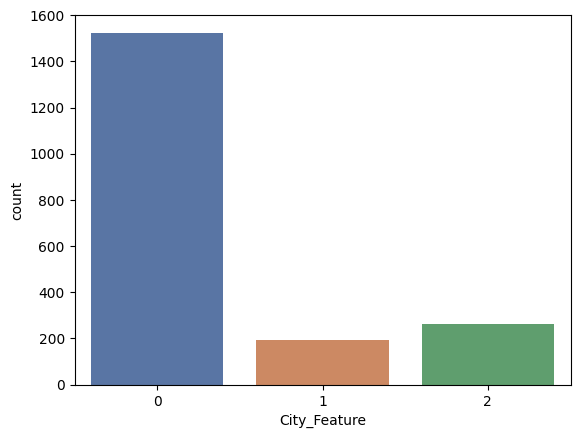

In [23]:
sns.countplot(data = Loan , x = 'City_Feature' , palette = 'deep')

### 3. Employer_type1

In [24]:
Loan.Employer_type1.value_counts()

0    832
1    627
2    523
Name: Employer_type1, dtype: int64

<AxesSubplot: xlabel='Employer_type1', ylabel='count'>

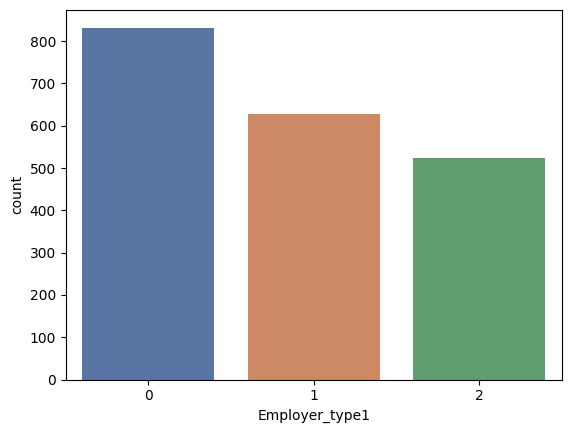

In [25]:
sns.countplot(data = Loan , x = 'Employer_type1' , palette = 'deep')

### 4. Employer_type2

In [26]:
Loan.Employer_type2.value_counts()

4    1703
1     145
2      89
3      45
Name: Employer_type2, dtype: int64

<AxesSubplot: xlabel='Employer_type2', ylabel='count'>

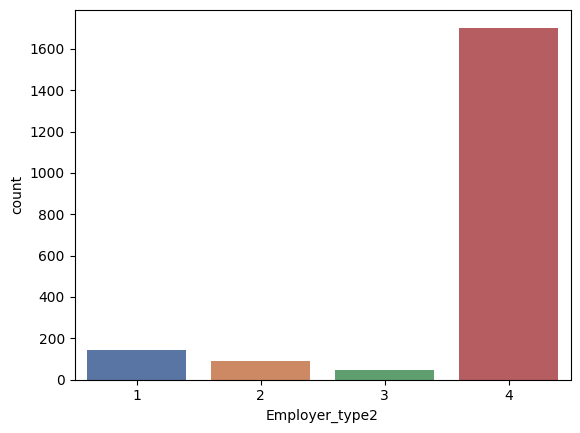

In [27]:
sns.countplot(data = Loan , x = 'Employer_type2' , palette = 'deep')

### 5. Income

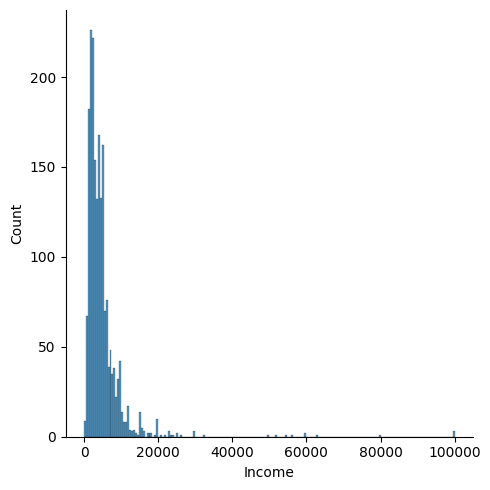

In [29]:
sns.displot(data = Loan , x = 'Income')

<AxesSubplot: xlabel='Income'>

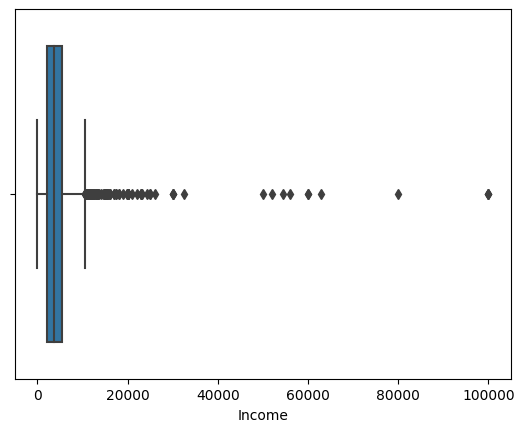

In [30]:
sns.boxplot(data = Loan , x = 'Income')

### 6. ExistingBankType

In [31]:
Loan.ExistingBankType.value_counts()

1    1448
0     534
Name: ExistingBankType, dtype: int64

<AxesSubplot: xlabel='ExistingBankType', ylabel='count'>

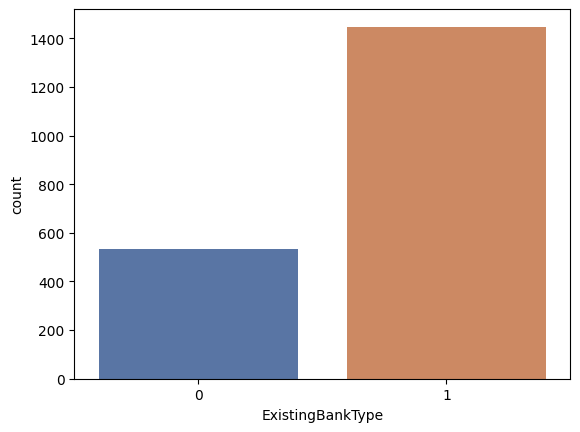

In [32]:
sns.countplot(data = Loan , x = 'ExistingBankType' , palette = 'deep')

### 7. Source_Cat

In [33]:
Loan.Source_Cat.value_counts()

0    909
4    697
1    331
2     30
3     15
Name: Source_Cat, dtype: int64

<AxesSubplot: xlabel='Source_Cat', ylabel='count'>

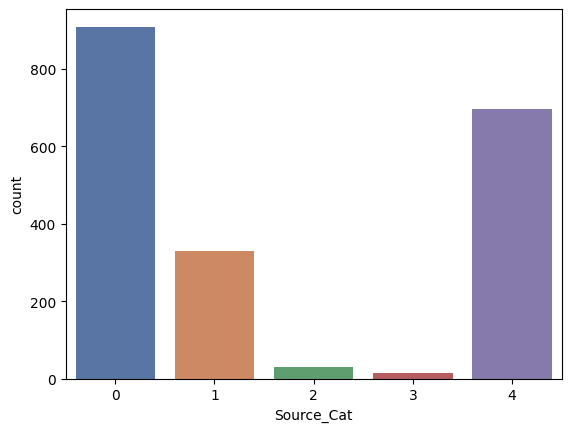

In [34]:
sns.countplot(data = Loan , x = 'Source_Cat' , palette = 'deep')

### 8. Existing_EMI

In [35]:
Loan.Existing_EMI.dtypes

dtype('float64')

<AxesSubplot: xlabel='Existing_EMI', ylabel='Count'>

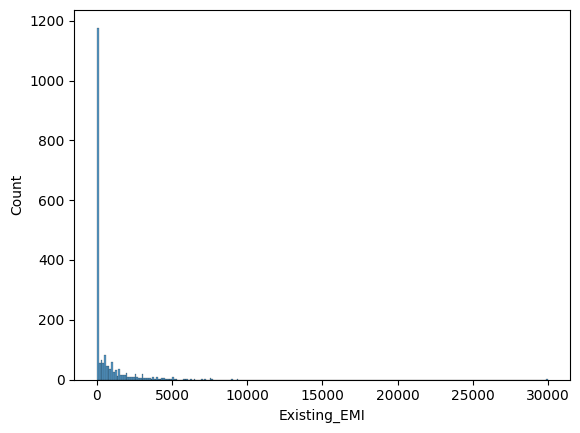

In [36]:
sns.histplot(data = Loan , x = 'Existing_EMI')

<AxesSubplot: xlabel='Existing_EMI'>

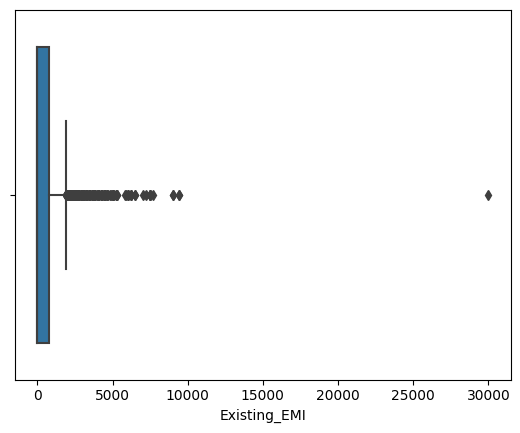

In [37]:
sns.boxplot(data = Loan , x = 'Existing_EMI')

### 9. Feature1

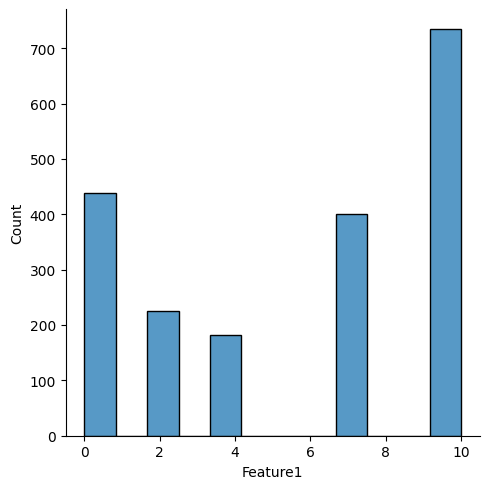

In [38]:
sns.displot(data = Loan , x = 'Feature1')

<AxesSubplot: xlabel='Feature1'>

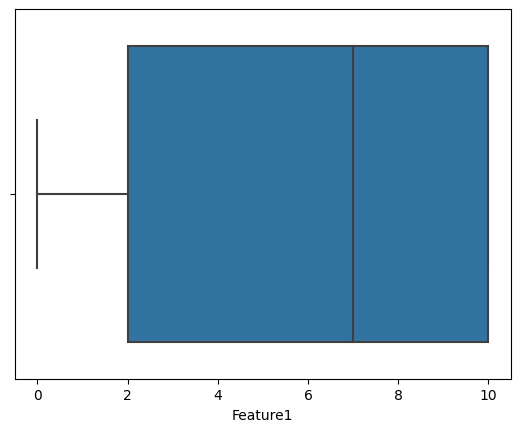

In [39]:
sns.boxplot(data = Loan , x = 'Feature1')

###  Divide the data in dependent and independent variable.

In [19]:
X = Loan.iloc[:,0:9] # Independent Variable
y = Loan.iloc[:,-1] # Dependent/Target variable

Used index location method to divide the dataset into dependent and independent

###  Split the data into train and test data with 80:20 proportion.

In [20]:
#Importing train_test_split package 
from sklearn.model_selection import train_test_split

#Secondly dividing the dataset for training and testing,
#training data: 80%, and testing data: 20% with random_state= 0 to repeat the same training and testing data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 1)

In [21]:
# shapes of all 4 datasets created in Q3 & Q4.
# Size of training and testing dataset

print("the size of X_train data ",X_train.shape)
print("the size of X_test data ", X_test.shape)
print("the size of y_test data ", y_test.shape)
print("the size of y_train data ", y_train.shape)

the size of X_train data  (1585, 9)
the size of X_test data  (397, 9)
the size of y_test data  (397,)
the size of y_train data  (1585,)


In [22]:
# Applying standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## C. Model Building and Evaluation.

### (Model 1) SVM

In [23]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced', probability=True) # rbf kernel is default
svc = svc.fit(X_train_sc, y_train)

In [24]:
#Prediction
y_pred_test_rbf = svc.predict(X_test_sc)
y_pred_train_rbf = svc.predict(X_train_sc)

Predicted values of train and test Data

In [25]:
#Showing the Actual v/s Predicted Values
svm_res= pd.DataFrame(columns= ['Actual','Predicted','Probability of Churning'])
svm_res['Actual']= y_test
svm_res['Predicted']= svc.predict(X_test_sc)
svm_res['Probability of Churning']= 1-svc.predict_proba(X_test_sc)
svm_res.head(10)

,Actual,Predicted,Probability of Churning
1340,1,1,0.776286
1441,1,0,0.442258
1512,1,1,0.842394
108,0,0,0.168299
1559,0,1,0.773752
87,0,0,0.186003
1931,1,1,0.693470
612,0,0,0.250457
1666,1,1,0.816268
1390,1,1,0.765496


Display of the actual vs predicted and Probability values of getting Loan Approved

In [26]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_SVM_train = accuracy_score(y_train,y_pred_train_rbf)
print('Accuracy of the train data :', accuracy_SVM_train)
accuracy_SVM_test = accuracy_score(y_test,y_pred_test_rbf) 
print('Accuracy of the test data :' , accuracy_SVM_test)

Accuracy of the train data : 0.7634069400630915
Accuracy of the test data : 0.7405541561712846


In [27]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_test_rbf))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71       207
           1       0.68      0.87      0.76       190

    accuracy                           0.74       397
   macro avg       0.76      0.75      0.74       397
weighted avg       0.76      0.74      0.74       397



### Results : SVM model 
    1) Precision for Loan not Approved Customer is 0.84 and for Loan Approved customer is 0.68
    2) Recall for Loan not Approved Customer is 0.62 and for Loan Approved customer is 0.87 , from this result we can say 
       that model is biased towards Loan Approved Customer.
    3) Accuracy of the model is 0.74

### (Model-2) Logistic Regression

In [28]:
#Importing Logistic Regression package
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Object First
lr = LogisticRegression()

#.fit() takes x, y, and possibly observation-related weights. Then it fits the model and returns the model instance itself:
lr = lr.fit(X_train_sc, y_train)

In [29]:
#Showing the respective coefficients of all the variables with respect to y=churn
data_coef = pd.DataFrame(columns = ['Variables', 'Coefficient_value'])
data_coef['Variables'] = X.columns
data_coef['Coefficient_value'] = lr.coef_[0]
data_coef

,Variables,Coefficient_value
0,Gender,0.113929
1,City_Feature,-0.021263
2,Employer_type1,0.171936
3,Employer_type2,-0.029016
4,Income,0.277874
5,ExistingBankType,0.124041
6,Source_Cat,0.087438
7,Existing_EMI,0.650152
8,Feature1,0.884429


In [30]:
#Prediction
y_pred_test_lr = lr.predict(X_test_sc)
y_pred_train_lr = lr.predict(X_train_sc)

Predicted values of train and test dataset

In [31]:
#Showing the Actual v/s Predicted Values
lr_res= pd.DataFrame(columns= ['Actual','Predicted','Probability of Churning'])
lr_res['Actual']= y_test
lr_res['Predicted']= lr.predict(X_test_sc)
lr_res['Probability of Churning']= 1-lr.predict_proba(X_test_sc)
lr_res.head(10)

,Actual,Predicted,Probability of Churning
1340,1,1,0.784879
1441,1,1,0.536802
1512,1,1,0.689480
108,0,0,0.174824
1559,0,1,0.597164
87,0,0,0.109800
1931,1,1,0.730554
612,0,0,0.320486
1666,1,1,0.668085
1390,1,1,0.697850


In [32]:
# Accuracy of the train and test dataset
accuracy_lr_train = accuracy_score(y_train,y_pred_train_lr)
print('Accuracy of the train data :', accuracy_lr_train)
accuracy_lr_test = accuracy_score(y_test,y_pred_test_lr) 
print('Accuracy of the test data :' , accuracy_lr_test)

Accuracy of the train data : 0.7211356466876971
Accuracy of the test data : 0.7405541561712846


case of underfitting 

In [33]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.81      0.66      0.73       207
           1       0.69      0.83      0.75       190

    accuracy                           0.74       397
   macro avg       0.75      0.74      0.74       397
weighted avg       0.75      0.74      0.74       397



### Results : Logistic Regression model 
    1) Precision for Loan not Approved Customer is 0.81 and for Loan Approved customer is 0.69
    2) Recall for Loan not Approved Customer is 0.66 and for Loan Approved customer is 0.83 , from this result we can say 
       that model is biased towards Loan Approved Customer.
    3) Accuracy of the model is 0.74

###  (Model - 3) Decision Tree

In [34]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=100, random_state = 33)
dt = classifier_dt.fit(X_train_sc, y_train)

In [35]:
#Showing the Actual v/s Predicted Values
dt_res= pd.DataFrame(columns= ['Actual','Predicted','Probability of Churning'])
dt_res['Actual']= y_test
dt_res['Predicted']= dt.predict(X_test_sc)
dt_res['Probability of Churning']= 1-dt.predict_proba(X_test_sc)
dt_res.head(10)

,Actual,Predicted,Probability of Churning
1340,1,1,0.875776
1441,1,0,0.222222
1512,1,1,0.875776
108,0,0,0.020067
1559,0,1,0.888889
87,0,0,0.020067
1931,1,0,0.000000
612,0,0,0.295699
1666,1,1,0.888889
1390,1,1,0.636364


In [36]:
# Predicting Cross Validation Score
from sklearn.model_selection import cross_val_score

y_pred_dt_train = classifier_dt.predict(X_train_sc) 
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Accuracy of Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_sc)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Accuracy of Test set: ", accuracy_dt_test)

Accuracy of Training set:  0.8441640378548896
Accuracy of Test set:  0.7329974811083123


In [37]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       207
           1       0.69      0.81      0.74       190

    accuracy                           0.73       397
   macro avg       0.74      0.74      0.73       397
weighted avg       0.74      0.73      0.73       397



### Results : Decision Tree model 
    1) Precision for Loan not Approved Customer is 0.79 and for Loan Approved customer is 0.69
    2) Recall for Loan not Approved Customer is 0.67 and for Loan Approved customer is 0.81 , from this result we can say 
       that model is biased towards Loan Approved Customer.
    3) Accuracy of the model is 0.73

### (Model-4) Random Forest

In [38]:
#Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [39]:
rf_accuracy_df= pd.DataFrame(columns=['No. of Trees','Accuracy','F1 Score'])
count=0

#Creating various Random Forest Models to find the appropriate no. of trees
for i in range(100,400,25):
    rf_models=RandomForestClassifier(n_estimators=i,criterion='gini',random_state=0)
    rf_models.fit(X_train_sc,y_train)
    y_rf_pred=rf_models.predict(X_test_sc)       
    rf_accuracy_df.loc[count,'No. of Trees']= i
    rf_accuracy_df.loc[count,'Accuracy']= round(metrics.accuracy_score(y_test,y_rf_pred)*100,2)
    rf_accuracy_df.loc[count,'F1 Score']= round(metrics.f1_score(y_test,y_rf_pred)*100,2)
    count=count+1

rf_accuracy_df

,No. of Trees,Accuracy,F1 Score
0,100,72.04,72.99
1,125,72.04,73.12
2,150,72.54,73.61
3,175,72.54,73.35
4,200,71.54,72.24
5,225,71.79,72.55
6,250,71.54,72.51
7,275,71.54,72.37
8,300,71.79,72.55
9,325,71.28,72.33


In [40]:
#Final Random Forest model with 350 trees, using gini as criterion and random state is 0
rf = RandomForestClassifier(n_estimators=350, criterion='gini',random_state=0)

#Fitting the model with the training data
rf = rf.fit(X_train_sc, y_train)

In [41]:
# Accuracy of the train and test dataset
y_pred_rf_train = rf.predict(X_train_sc)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accur acy_rf_train)

y_pred_rf_test = rf.predict(X_test_sc)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  0.9899053627760253
Test set:  0.7128463476070529


In [42]:
confusion_matrix(y_test, y_pred_rf_test)

array([[135,  72],
       [ 42, 148]], dtype=int64)

In [43]:
#Showing the Actual v/s Predicted Values
rf_res= pd.DataFrame(columns= ['Actual','Predicted','Probability of Churning'])
rf_res['Actual']= y_test
rf_res['Predicted']= rf.predict(X_test_sc)
rf_res['Probability of Churning']= 1-rf.predict_proba(X_test_sc)
rf_res.head(10)

,Actual,Predicted,Probability of Churning
1340,1,1,0.914286
1441,1,0,0.380000
1512,1,1,0.922857
108,0,0,0.000000
1559,0,1,0.854286
87,0,0,0.000000
1931,1,1,0.648571
612,0,0,0.486524
1666,1,1,0.657143
1390,1,1,0.601175


In [44]:
#Classification report
print(classification_report(y_test , y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       207
           1       0.67      0.78      0.72       190

    accuracy                           0.71       397
   macro avg       0.72      0.72      0.71       397
weighted avg       0.72      0.71      0.71       397



### Results : Random Forest model 
    1) Precision for Loan not Approved Customer is 0.76 and for Loan Approved customer is 0.67
    2) Recall for Loan not Approved Customer is 0.65 and for Loan Approved customer is 0.78 , from this result we can say 
       that model is biased towards Loan Approved Customer.
    3) Accuracy of the model is 0.71

## 5) Compare the accuracy, precision, recall of the above models with each other

In [45]:
# creating the arrays of probabilities of churning for every model
probs_svm = svm_res.iloc[:, 2]
probs_lr = lr_res.iloc[:, 2]
probs_dt = dt_res.iloc[:, 2]
probs_rf = rf_res.iloc[:, 2]

### ROC Curves of the Models

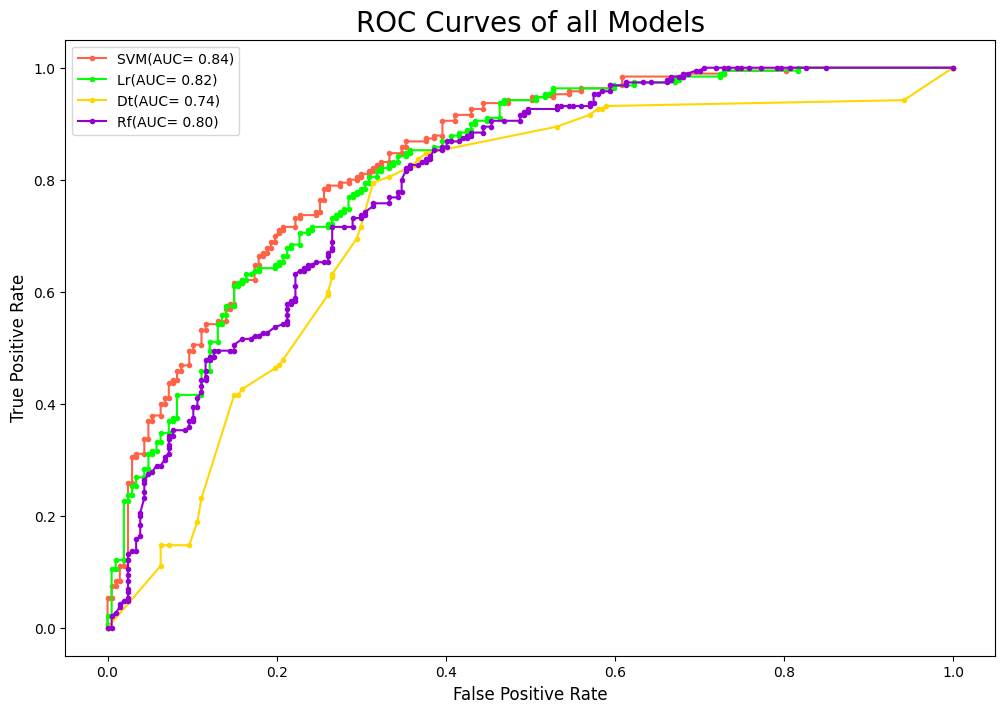

In [46]:
#plotting ROC (Receiver's operating characteristics): true positive rate(recall) against false positive rate

plt.figure(figsize=(12,8))

svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs_svm)
auc_scoreSVM = metrics.roc_auc_score(y_test, probs_svm)
plt.plot(svm_fpr, svm_tpr, marker='.', label = 'SVM(AUC= %.2f)' % auc_scoreSVM, color='tomato')

lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, probs_lr)
auc_scoreLr = metrics.roc_auc_score(y_test, probs_lr)
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Lr(AUC= %.2f)' % auc_scoreLr, color='lime')

dt_fpr, dt_tpr, thresholds = metrics.roc_curve(y_test, probs_dt)
auc_scoreDt = metrics.roc_auc_score(y_test, probs_dt)
plt.plot(dt_fpr, dt_tpr, marker='.', label = 'Dt(AUC= %.2f)' % auc_scoreDt,  color='gold')

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, probs_rf)
auc_scoreRf = metrics.roc_auc_score(y_test, probs_rf)
plt.plot(rf_fpr, rf_tpr, marker='.', label= 'Rf(AUC= %.2f)' % auc_scoreRf, color='darkviolet')

plt.title('ROC Curves of all Models', fontsize= 20)
plt.xlabel('False Positive Rate', fontsize= 12)
plt.ylabel('True Positive Rate', fontsize= 12)

plt.legend()

Highest AOC value of ROC curve coming is 0.84 in SVM model followed by the Logistic and the smallest is in Decision tree

### Precision Recall Curves of the Models

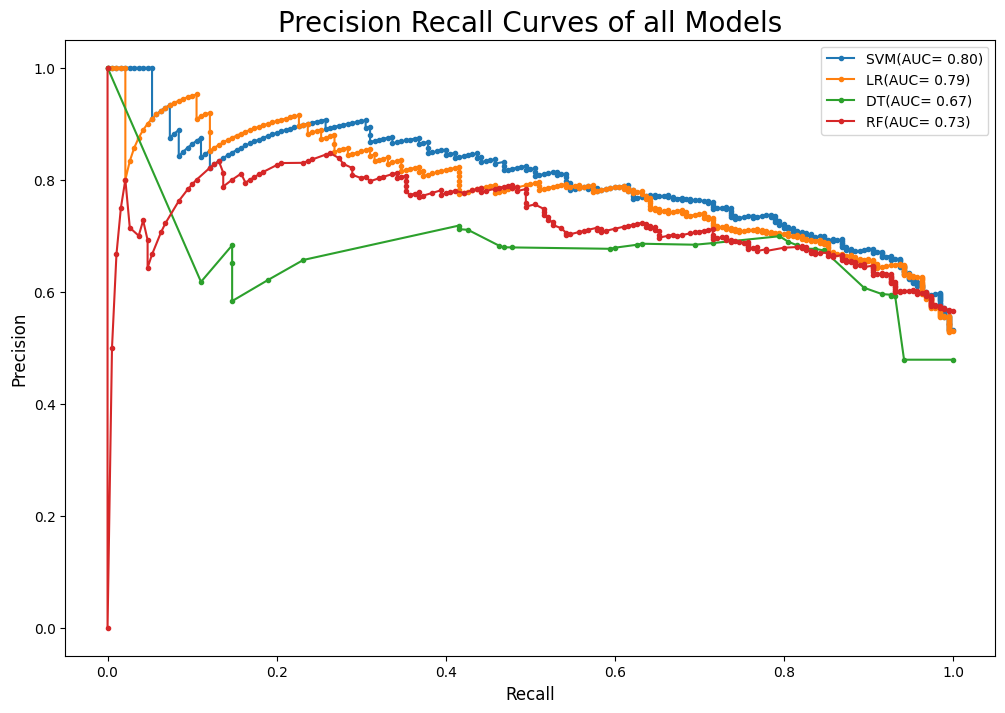

In [47]:
#plotting precision against recall 
#values of precision, recall and threshold are obtained throught scikit learn library 

plt.figure(figsize=(12,8))

svm_precision, svm_recall, thresholds = metrics.precision_recall_curve(y_test, probs_svm)
pr_auc_score_svm = metrics.auc(svm_recall, svm_precision)
plt.plot(svm_recall, svm_precision, marker = '.', label = 'SVM(AUC= %.2f)' % pr_auc_score_svm)

lr_precision, lr_recall, thresholds = metrics.precision_recall_curve(y_test, probs_lr)
pr_auc_score_lr = metrics.auc(lr_recall, lr_precision)
plt.plot(lr_recall, lr_precision, marker = '.', label = 'LR(AUC= %.2f)' % pr_auc_score_lr)

dt_precision, dt_recall, thresholds = metrics.precision_recall_curve(y_test, probs_dt)
pr_auc_score_dt = metrics.auc(dt_recall, dt_precision)
plt.plot(dt_recall, dt_precision, marker = '.', label = 'DT(AUC= %.2f)' % pr_auc_score_dt)
 
rf_precision, rf_recall, thresholds = metrics.precision_recall_curve(y_test, probs_rf)
pr_auc_score_rf = metrics.auc(rf_recall, rf_precision)
plt.plot(rf_recall, rf_precision, marker = '.', label = 'RF(AUC= %.2f)' % pr_auc_score_rf)

#sns.lineplot([0,1], [0.5, 0.5], linestyle = '--')

plt.title('Precision Recall Curves of all Models', fontsize= 20)
plt.xlabel('Recall', fontsize= 12)
plt.ylabel('Precision', fontsize= 12)
         
plt.legend()

###  Comparision of Accuracy of the models 

In [48]:
models =  [('SVM' , accuracy_SVM_train, accuracy_SVM_test) , ('Logistic Regression' , accuracy_lr_train, accuracy_lr_test),('Decision tree',
            accuracy_dt_train, accuracy_dt_test),('Random Forest' , accuracy_rf_train, accuracy_rf_test)]

In [49]:
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy(training)', 'Accuracy(test)'])
predict

,Model,Accuracy(training),Accuracy(test)
0,SVM,0.763407,0.740554
1,Logistic Regression,0.721136,0.740554
2,Decision tree,0.844164,0.732997
3,Random Forest,0.989905,0.712846


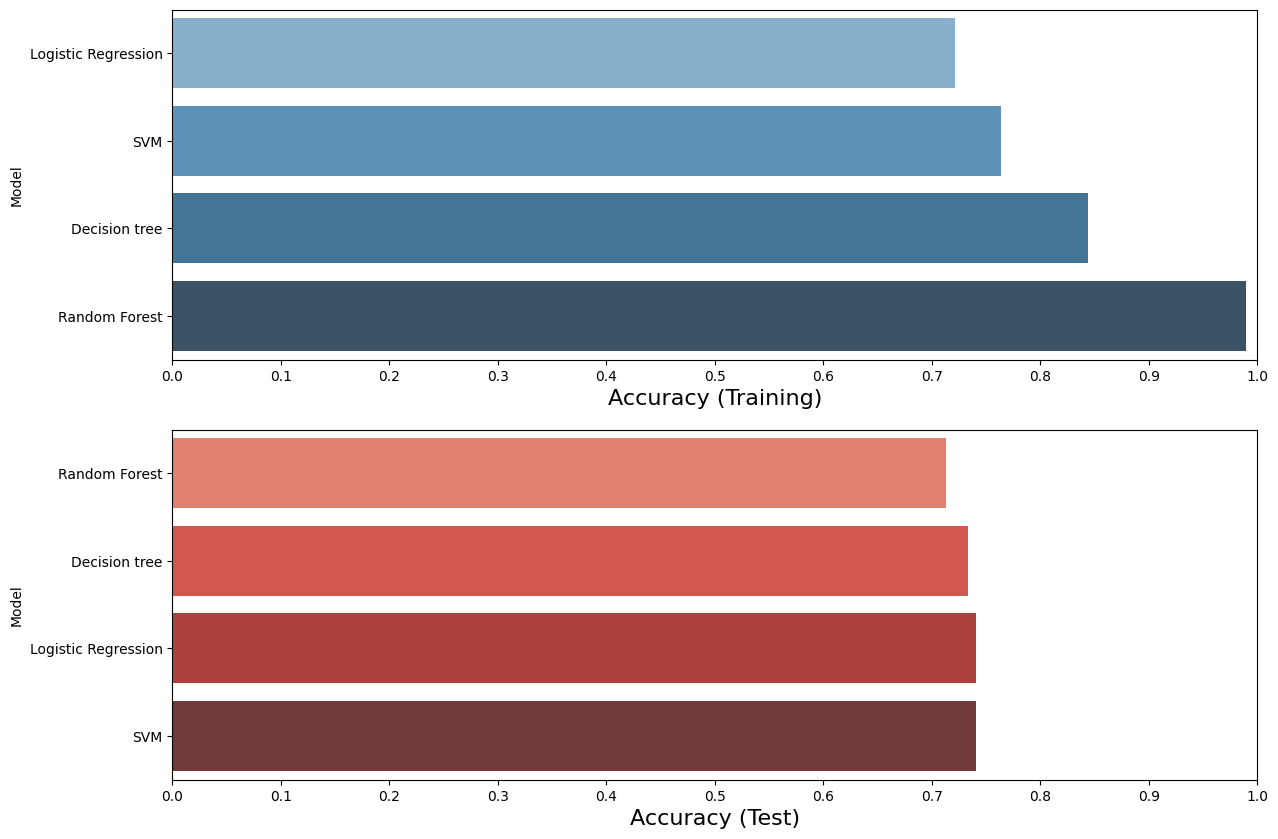

In [50]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'],  inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'],  inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## Conclusion 

On the basis of this analysis , as we can see the difference between the accuracy of training and test dataset is less in SVM Model
than the other modelso will take SVM model into consideration.
In case of Random Forest accuracy of the train dataset is so high almost near to 1 i.e 0.99 and of the test dataset is .71 which is very less than train data
and this is the case of overfitting of the model therefore Random Forest is not considerable.

## Feature Importance

In [51]:
#calculating feature importance
importances = rf.feature_importances_*100

#creating a feature importance dataframe
impfea_df = pd.DataFrame({'Feature Name': X_train.columns, 'Importance %': importances})
impfea_df.sort_values(by= 'Importance %', ascending= False)

,Feature Name,Importance %
4,Income,46.740179
7,Existing_EMI,14.069003
8,Feature1,12.312402
6,Source_Cat,6.133366
2,Employer_type1,6.115246
1,City_Feature,4.067294
3,Employer_type2,3.881862
0,Gender,3.428636
5,ExistingBankType,3.252012


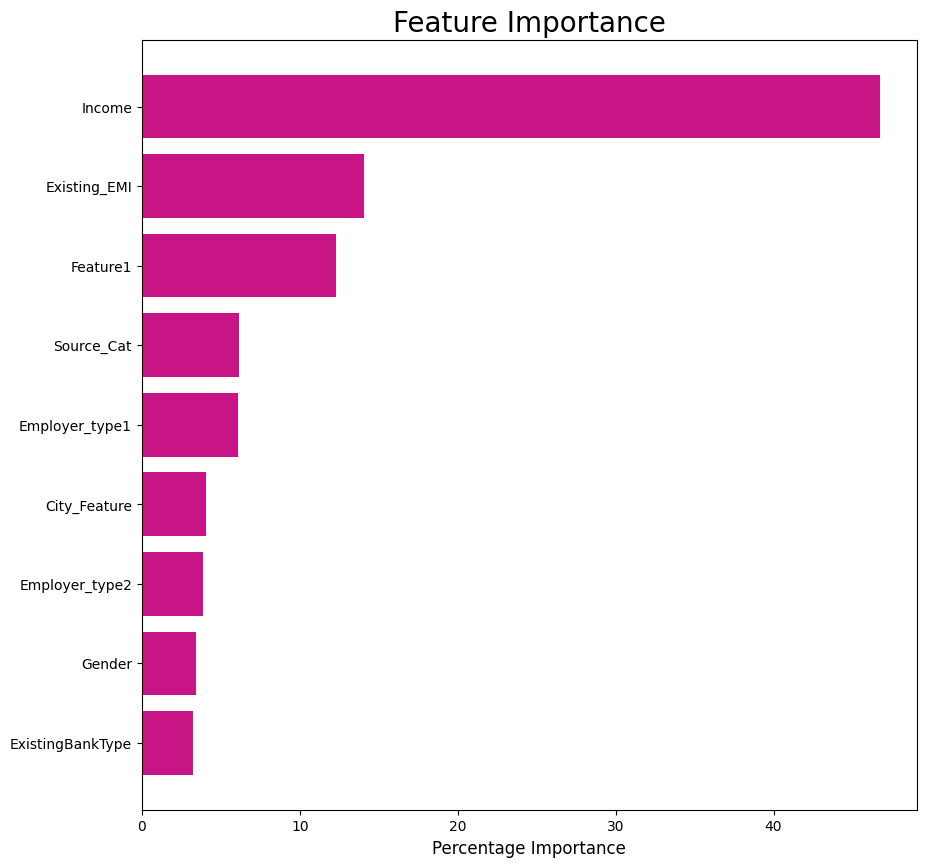

In [52]:
#sorting features in decending order of their importance
indices = np.argsort(importances)[::1] 
names = [X_train.columns[i] for i in indices]

#Visualizing feature importance
plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices], color= 'mediumvioletred')
plt.yticks(range(X_train.shape[1]), names)
plt.title("Feature Importance")
plt.title('Feature Importance', fontsize= 20)
plt.xlabel('Percentage Importance', fontsize= 12)
plt.show()

As we can see income feature is having nearly half of the feature importance(0.467) followed by the Existing_EMI(0.1406) and Feature1  (0.123) and else.